# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "BTC"
cryptoPair = "USDT"

trainTestSplit = 0.8

### Loading the whale data

In [3]:
data=pd.read_csv('Datasets/dataFileWhaleBTC.csv')

In [4]:
li = data['tweet'].str.lower().str.cat(sep=' ')

# Getting Tokenization of the text

In [5]:
data = data[['date','time','tweet']]
data['tweet'].head()

0    🚨 🚨 🚨 🚨  1,000 #BTC (46,917,121 USD) transferr...
1    🚨 🚨 🚨 🚨  1,000 #BTC (46,917,121 USD) transferr...
2    🚨 🚨  20,000,000 #USDT (20,000,000 USD) transfe...
3    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
4    🚨 🚨  29,999,975 #USDT (29,999,975 USD) transfe...
Name: tweet, dtype: object

In [6]:
#nums = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'][0]
#data['amountTransfer'] = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', data['tweet'])[0]
data['amountTransfer'] = data['tweet'].str.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)')
data['amountTransfer'] = data['amountTransfer'].str[1]

In [7]:
data

,date,time,tweet,amountTransfer
0,2021-12-30,23:59:11,"🚨 🚨 🚨 🚨 1,000 #BTC (46,917,121 USD) transferr...","46,917,121"
1,2021-12-30,23:59:11,"🚨 🚨 🚨 🚨 1,000 #BTC (46,917,121 USD) transferr...","46,917,121"
2,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
3,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
4,2021-12-30,23:17:39,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
...,...,...,...,...
12368,2021-01-01,01:28:30,"🚨 350 #BTC (10,317,529 USD) transferred from ...","10,317,529"
12369,2021-01-01,01:07:58,"🚨 350 #BTC (10,205,039 USD) transferred from ...","10,205,039"
12370,2021-01-01,01:07:58,"🚨 350 #BTC (10,205,039 USD) transferred from ...","10,205,039"
12371,2021-01-01,00:58:48,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 3,437 #BTC (99,789,948 USD)...","99,789,948"


# SentimentIntensityAnalyzer for getting sentiments

### Loading dataset price data

In [8]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
priceData = pd.DataFrame(klines)
priceData.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
priceData.index = [dt.datetime.fromtimestamp(x/1000.0) for x in priceData.close_time]
#priceData=priceData[['open', 'high', 'low', 'close']]
priceData=priceData[['close']]
priceData.head()
priceData = priceData.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [9]:
priceData.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,29278.40000000
2021-01-01 07:59:59.999,29092.83000000
2021-01-01 11:59:59.999,29313.49000000
2021-01-01 15:59:59.999,29188.67000000
2021-01-01 19:59:59.999,29029.04000000


### Five last records of data

In [10]:
priceData.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,47191.09000000
2021-12-31 11:59:59.999,47975.76000000
2021-12-31 15:59:59.999,48005.37000000
2021-12-31 19:59:59.999,45728.28000000
2021-12-31 23:59:59.999,46216.93000000


### Coloumns/features in data

In [11]:
priceData.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [12]:
print('lenght of data is', len(priceData)) #lenght of data

lenght of data is 2190


### Shape of data

In [13]:
data.shape #shape of data

(12373, 4)

### Data information

In [14]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12373 entries, 0 to 12372
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12373 non-null  object
 1   time            12373 non-null  object
 2   tweet           12373 non-null  object
 3   amountTransfer  12373 non-null  object
dtypes: object(4)
memory usage: 386.8+ KB


In [15]:
data.head(10-8)

,date,time,tweet,amountTransfer
0,2021-12-30,23:59:11,"🚨 🚨 🚨 🚨 1,000 #BTC (46,917,121 USD) transferr...","46,917,121"
1,2021-12-30,23:59:11,"🚨 🚨 🚨 🚨 1,000 #BTC (46,917,121 USD) transferr...","46,917,121"


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12373 entries, 0 to 12372
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12373 non-null  object
 1   time            12373 non-null  object
 2   tweet           12373 non-null  object
 3   amountTransfer  12373 non-null  object
dtypes: object(4)
memory usage: 386.8+ KB


In [17]:
#data=data.head(1000)

### Data types of all coloumns

In [18]:
data.dtypes #data types of data

date              object
time              object
tweet             object
amountTransfer    object
dtype: object

### Checking missing Values

In [19]:
data[data.isnull().any(axis=1)].head() #checking the null values 

,date,time,tweet,amountTransfer


### Count of missing values

In [20]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [21]:
data.isnull().values.any() #checking the null values 

False

In [22]:
data.iloc[9:25]

,date,time,tweet,amountTransfer
9,2021-12-30,21:49:44,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,439 #USDT (69,997,439 USD)...","69,997,439"
10,2021-12-30,21:21:31,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,459 #USDT (69,997,459 USD)...","69,997,459"
11,2021-12-30,21:03:44,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 300,000,000 #USDT (300,00...","300,000,000"
12,2021-12-30,20:57:20,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 300,000,000 #USDT (300,00...","300,000,000"
13,2021-12-30,20:34:41,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,459 #USDT (69,997,459 USD)...","69,997,459"
14,2021-12-30,19:51:28,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,479 #USDT (69,997,479 USD)...","69,997,479"
15,2021-12-30,19:34:58,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 10,158 #BTC (482,771,191 ...","482,771,191"
16,2021-12-30,19:34:57,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 2,872 #BTC (136,365,124 U...","136,365,124"
17,2021-12-30,19:27:23,"🚨 🚨 🚨 🚨 🚨 🚨 69,997,479 #USDT (69,997,479 USD)...","69,997,479"
18,2021-12-30,18:05:38,"🚨 🚨 500 #BTC (23,650,989 USD) transferred fro...","23,650,989"


### Counts of missing values in each column

In [23]:
data.isnull().sum() #checking the null values columns wise 

date              0
time              0
tweet             0
amountTransfer    0
dtype: int64

In [24]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
priceData['close']=priceData['close'].astype(float)

### Spliting date into day, month and year

In [25]:
priceData['date'] = priceData.index # taking dates in date column 
priceData.sort_index(ascending=True, inplace=True)
priceData['Month'] = priceData['date'].dt.month # extracting months from data
priceData['Day'] = priceData['date'].dt.day # extracting day from data
priceData['Year'] = priceData['date'].dt.year # extracting year from data
priceData['Hour'] = priceData['date'].dt.hour # extracting year from data
priceData['Minutes'] = priceData['date'].dt.minute # extracting year from data

### Close price with respect to year 

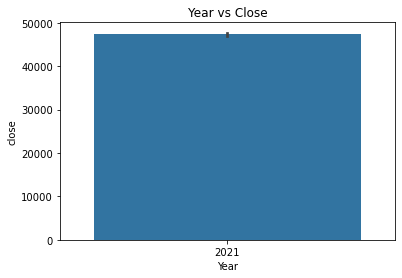

In [26]:
sns.barplot(x='Year', y='close', data=priceData).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

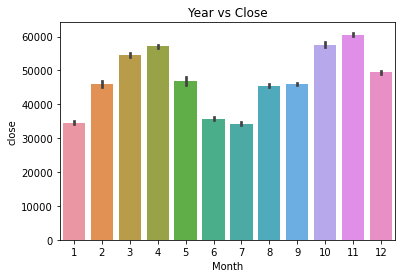

In [27]:
sns.barplot(x='Month', y='close', data=priceData).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Merging whale alerts with price data

# ------------------------------------------------------------------------------------------------------

In [28]:
data.head()

,date,time,tweet,amountTransfer
0,2021-12-30,23:59:11,"🚨 🚨 🚨 🚨 1,000 #BTC (46,917,121 USD) transferr...","46,917,121"
1,2021-12-30,23:59:11,"🚨 🚨 🚨 🚨 1,000 #BTC (46,917,121 USD) transferr...","46,917,121"
2,2021-12-30,23:24:22,"🚨 🚨 20,000,000 #USDT (20,000,000 USD) transfe...","20,000,000"
3,2021-12-30,23:21:26,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"
4,2021-12-30,23:17:39,"🚨 🚨 29,999,975 #USDT (29,999,975 USD) transfe...","29,999,975"


In [29]:
priceData.head(10)

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,29278.40,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,29092.83,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,29313.49,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,29188.67,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,29029.04,2021-01-01 19:59:59.999,1,1,2021,19,59
2021-01-01 23:59:59.999,29331.69,2021-01-01 23:59:59.999,1,1,2021,23,59
2021-01-02 03:59:59.999,29351.95,2021-01-02 03:59:59.999,1,2,2021,3,59
2021-01-02 07:59:59.999,29750.00,2021-01-02 07:59:59.999,1,2,2021,7,59
2021-01-02 11:59:59.999,29755.00,2021-01-02 11:59:59.999,1,2,2021,11,59
2021-01-02 15:59:59.999,31691.29,2021-01-02 15:59:59.999,1,2,2021,15,59


In [30]:
priceData['whaleCount'] = 0

In [31]:
for i, row in enumerate(data.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'whaleCount'] += 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'whaleCount'] += 1
    else:
        if int(row.amountTransfer.replace(",","")) > 50000000:
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 2
        else:
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'whaleCount'] += 1

In [32]:
priceData.loc[priceData['whaleCount'] > 0]

,close,date,Month,Day,Year,Hour,Minutes,whaleCount
2021-01-01 03:59:59.999,29278.40,2021-01-01 03:59:59.999,1,1,2021,3,59,16
2021-01-01 07:59:59.999,29092.83,2021-01-01 07:59:59.999,1,1,2021,7,59,6
2021-01-01 11:59:59.999,29313.49,2021-01-01 11:59:59.999,1,1,2021,11,59,18
2021-01-01 15:59:59.999,29188.67,2021-01-01 15:59:59.999,1,1,2021,15,59,10
2021-01-01 19:59:59.999,29029.04,2021-01-01 19:59:59.999,1,1,2021,19,59,7
...,...,...,...,...,...,...,...,...
2021-12-30 07:59:59.999,46980.71,2021-12-30 07:59:59.999,12,30,2021,7,59,2
2021-12-30 11:59:59.999,47515.45,2021-12-30 11:59:59.999,12,30,2021,11,59,8
2021-12-30 15:59:59.999,47159.41,2021-12-30 15:59:59.999,12,30,2021,15,59,25
2021-12-30 19:59:59.999,47558.35,2021-12-30 19:59:59.999,12,30,2021,19,59,31


# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

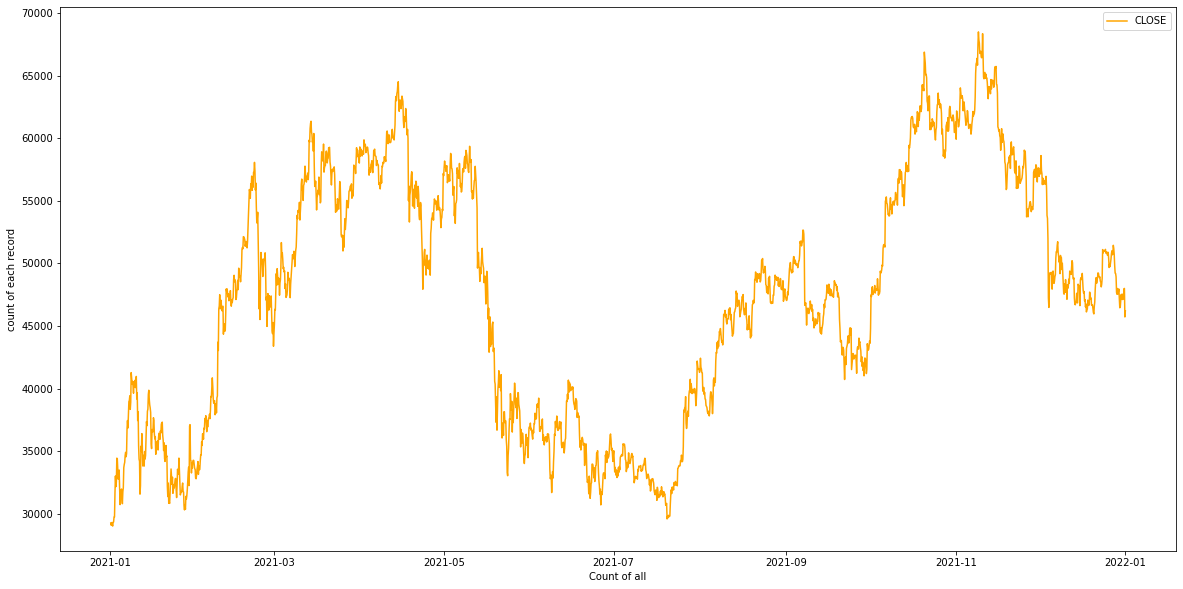

In [33]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(priceData.index, priceData['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [34]:
X=priceData.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

,Month,Day,Year,Hour,Minutes,whaleCount
2021-01-01 03:59:59.999,1,1,2021,3,59,16
2021-01-01 07:59:59.999,1,1,2021,7,59,6
2021-01-01 11:59:59.999,1,1,2021,11,59,18
2021-01-01 15:59:59.999,1,1,2021,15,59,10
2021-01-01 19:59:59.999,1,1,2021,19,59,7
...,...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,12,31,2021,19,59,0


### Taking target as output

In [35]:
y=priceData['close'] # output close 
y #output 

2021-01-01 03:59:59.999    29278.40
2021-01-01 07:59:59.999    29092.83
2021-01-01 11:59:59.999    29313.49
2021-01-01 15:59:59.999    29188.67
2021-01-01 19:59:59.999    29029.04
                             ...   
2021-12-31 07:59:59.999    47191.09
2021-12-31 11:59:59.999    47975.76
2021-12-31 15:59:59.999    48005.37
2021-12-31 19:59:59.999    45728.28
2021-12-31 23:59:59.999    46216.93
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [36]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# SARIMAX Model

In [37]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=arima_order,seasonal_order=(1,1,1,12))
    
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=9760.698
ARIMA(0, 0, 1) RMSE=9125.790
ARIMA(0, 0, 2) RMSE=8913.288
ARIMA(0, 1, 0) RMSE=17205.749
ARIMA(0, 1, 1) RMSE=17133.152
ARIMA(0, 1, 2) RMSE=17295.450
ARIMA(0, 2, 0) RMSE=105418.564
ARIMA(0, 2, 1) RMSE=12358.381
ARIMA(0, 2, 2) RMSE=12427.789
ARIMA(1, 0, 0) RMSE=10318.016
ARIMA(1, 0, 1) RMSE=10326.593
ARIMA(1, 0, 2) RMSE=16319.481
ARIMA(1, 1, 0) RMSE=17144.544
ARIMA(1, 1, 1) RMSE=17201.101
ARIMA(1, 1, 2) RMSE=19163.930
ARIMA(1, 2, 0) RMSE=65635.184
ARIMA(1, 2, 1) RMSE=12455.932
ARIMA(1, 2, 2) RMSE=26732.770
ARIMA(2, 0, 0) RMSE=10467.829
ARIMA(2, 0, 1) RMSE=13412.686
ARIMA(2, 0, 2) RMSE=12260.833
ARIMA(2, 1, 0) RMSE=17246.458
ARIMA(2, 1, 1) RMSE=18461.892
ARIMA(2, 1, 2) RMSE=22350.536
ARIMA(2, 2, 0) RMSE=88484.779
ARIMA(2, 2, 1) RMSE=12621.060
ARIMA(2, 2, 2) RMSE=12258.125
ARIMA(4, 0, 0) RMSE=10292.428
ARIMA(4, 0, 1) RMSE=3632.608
ARIMA(4, 0, 2) RMSE=5076.359
ARIMA(4, 1, 0) RMSE=17274.642
ARIMA(4, 1, 1) RMSE=21198.195
ARIMA(4, 1, 2) RMSE=21729.479
ARIMA(4, 2, 0)

In [38]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [39]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

### Best Parameter selected

In [40]:
best_cfg

(4, 0, 1)

# Evaluation Measures on Test data

# MSE

In [41]:
test_mse1=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  13195839.83473


# MAE

In [42]:
test_MAE1=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  2933.13699


# RMSE

In [43]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  3632.60786


# MAPE

In [44]:
test_mape1=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.05284


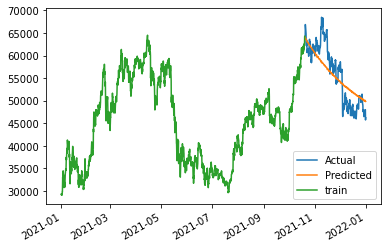

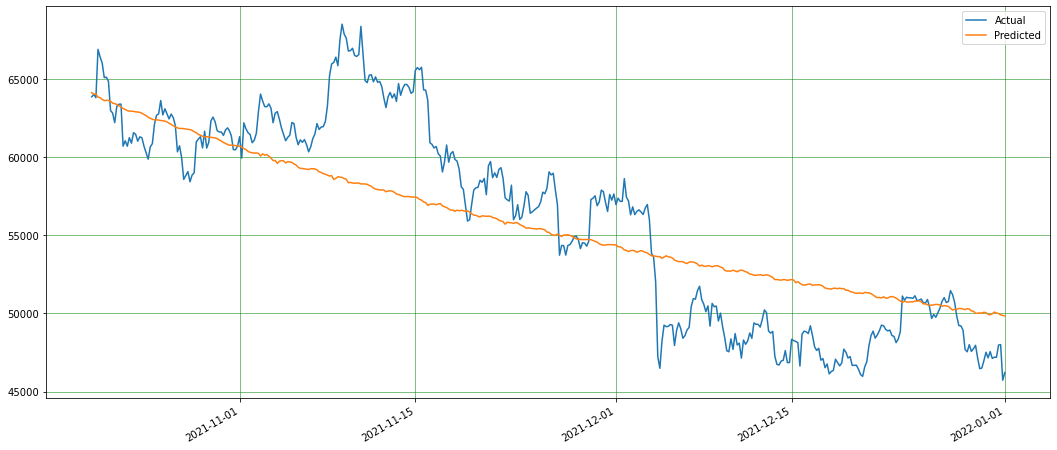

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# ARIMAX Model

### Parametrs

In [46]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=43922.317
ARIMA(0, 0, 1) RMSE=43851.104
ARIMA(0, 0, 2) RMSE=43788.577
ARIMA(0, 1, 0) RMSE=10510.522
ARIMA(0, 1, 1) RMSE=10498.477
ARIMA(0, 1, 2) RMSE=10577.197
ARIMA(0, 2, 0) RMSE=36359.861
ARIMA(0, 2, 1) RMSE=17199.718
ARIMA(0, 2, 2) RMSE=17151.002
ARIMA(1, 0, 0) RMSE=10500.121
ARIMA(1, 0, 1) RMSE=3928.883
ARIMA(1, 0, 2) RMSE=10200.337
ARIMA(1, 1, 0) RMSE=10504.980
ARIMA(1, 1, 1) RMSE=10520.804
ARIMA(1, 1, 2) RMSE=10604.409
ARIMA(1, 2, 0) RMSE=179124.782
ARIMA(1, 2, 1) RMSE=17165.291
ARIMA(1, 2, 2) RMSE=17166.155
ARIMA(2, 0, 0) RMSE=10500.485
ARIMA(2, 0, 1) RMSE=69945.671
ARIMA(2, 0, 2) RMSE=5941673.434
ARIMA(2, 1, 0) RMSE=10554.934
ARIMA(2, 1, 1) RMSE=10585.388
ARIMA(2, 1, 2) RMSE=10638.275
ARIMA(2, 2, 0) RMSE=190176.991
ARIMA(2, 2, 1) RMSE=17247.181
ARIMA(2, 2, 2) RMSE=18042.550
LU decomposition error.
ARIMA(4, 0, 1) RMSE=6145.512
ARIMA(4, 0, 2) RMSE=20535.470
ARIMA(4, 1, 0) RMSE=10560.786
ARIMA(4, 1, 1) RMSE=10452.523
ARIMA(4, 1, 2) RMSE=10585.523
ARIMA(4, 2, 0)

In [47]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['whaleCount'],order=(best_cfg))
results=model.fit()

### Best Parameter selected

In [48]:
best_cfg

(1, 0, 1)

In [49]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
y_pred_test = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [50]:
test_mse2=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  15436120.13519


# MAE

In [51]:
test_MAE2=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  3122.39585


# RMSE

In [52]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  3928.88281


# MAPE

In [53]:
test_mape2=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.05908


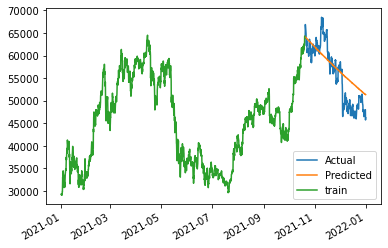

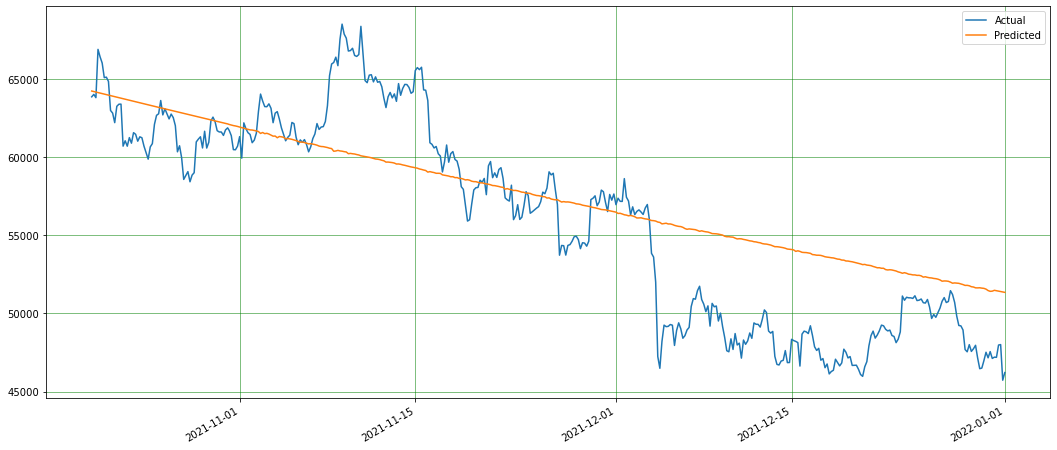

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [55]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [56]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 914787040.80072129
Iteration 2, loss = 905310517.84605038
Iteration 3, loss = 895877655.60606432
Iteration 4, loss = 886432748.82317209
Iteration 5, loss = 876880346.79679930
Iteration 6, loss = 867195441.79967010
Iteration 7, loss = 857323959.67819464
Iteration 8, loss = 847058753.78672230
Iteration 9, loss = 836348492.34233272
Iteration 10, loss = 825096798.99949706
Iteration 11, loss = 813354712.13821542
Iteration 12, loss = 801040706.50227475
Iteration 13, loss = 788070523.33089304
Iteration 14, loss = 774404408.03552067
Iteration 15, loss = 760065388.98514962
Iteration 16, loss = 745105979.81909537
Iteration 17, loss = 729470925.57116687
Iteration 18, loss = 713202395.98418665
Iteration 19, loss = 696287510.76553905
Iteration 20, loss = 678735079.89893818
Iteration 21, loss = 660582627.69454014
Iteration 22, loss = 641917733.74723172
Iteration 23, loss = 622599070.12454128
Iteration 24, loss = 602848428.47583044
Iteration 25, loss = 582652031.09800231
Iteration

Iteration 57, loss = 445781281.76865679
Iteration 58, loss = 434302353.44602722
Iteration 59, loss = 422764459.36654121
Iteration 60, loss = 411214513.71087646
Iteration 61, loss = 399728336.34391820
Iteration 62, loss = 388295753.58673251
Iteration 63, loss = 376904708.66441894
Iteration 64, loss = 365495959.34723341
Iteration 65, loss = 354259771.28348076
Iteration 66, loss = 343083588.21365553
Iteration 67, loss = 331956073.54584074
Iteration 68, loss = 320983174.20393831
Iteration 69, loss = 310153173.58118647
Iteration 70, loss = 299445391.41655290
Iteration 71, loss = 288920238.41101718
Iteration 72, loss = 278557071.22165567
Iteration 73, loss = 268440906.79403257
Iteration 74, loss = 258419505.15243259
Iteration 75, loss = 248675513.35917401
Iteration 76, loss = 239027322.11538965
Iteration 77, loss = 229722971.92921287
Iteration 78, loss = 220497046.04149753
Iteration 79, loss = 211564264.59522355
Iteration 80, loss = 202956066.78854090
Iteration 81, loss = 194401313.84373313


Iteration 292, loss = 30108351.03829250
Iteration 293, loss = 30107376.98414491
Iteration 294, loss = 30108716.71902601
Iteration 295, loss = 30105176.17457766
Iteration 296, loss = 30104093.13073230
Iteration 297, loss = 30103202.71030175
Iteration 298, loss = 30101681.03503313
Iteration 299, loss = 30101285.53421504
Iteration 300, loss = 30100231.20294911
Iteration 301, loss = 30100081.28839750
Iteration 302, loss = 30098211.37863554
Iteration 303, loss = 30103440.02168481
Iteration 304, loss = 30098139.98530795
Iteration 305, loss = 30099912.35116133
Iteration 306, loss = 30095065.89353222
Iteration 307, loss = 30093896.74827986
Iteration 308, loss = 30094237.17511726
Iteration 309, loss = 30092505.04014280
Iteration 310, loss = 30092739.75644444
Iteration 311, loss = 30090198.60198666
Iteration 312, loss = 30088022.88158861
Iteration 313, loss = 30087427.50030075
Iteration 314, loss = 30087460.63980186
Iteration 315, loss = 30086516.77720802
Iteration 316, loss = 30085731.46375626


Iteration 24, loss = 1069411397.70345509
Iteration 25, loss = 1061449427.59592247
Iteration 26, loss = 1053209261.58700049
Iteration 27, loss = 1044729382.94850051
Iteration 28, loss = 1035924731.80004156
Iteration 29, loss = 1026816756.28563654
Iteration 30, loss = 1017420248.59897625
Iteration 31, loss = 1007668676.89801514
Iteration 32, loss = 997631569.10449219
Iteration 33, loss = 987332854.59400499
Iteration 34, loss = 976765941.48058283
Iteration 35, loss = 965844279.73025119
Iteration 36, loss = 954653670.01135528
Iteration 37, loss = 943160616.17761552
Iteration 38, loss = 931361222.05933058
Iteration 39, loss = 919356526.10337901
Iteration 40, loss = 907077885.38046002
Iteration 41, loss = 894437047.36581099
Iteration 42, loss = 881548858.34320402
Iteration 43, loss = 868498668.16875017
Iteration 44, loss = 855091365.52990162
Iteration 45, loss = 841531514.00580513
Iteration 46, loss = 827717181.65814543
Iteration 47, loss = 813656465.48199069
Iteration 48, loss = 799487807.5

Iteration 261, loss = 46878826.98387823
Iteration 262, loss = 46875281.73442584
Iteration 263, loss = 46872593.53135996
Iteration 264, loss = 46870616.55524816
Iteration 265, loss = 46867296.98482864
Iteration 266, loss = 46864876.30005605
Iteration 267, loss = 46859863.53089668
Iteration 268, loss = 46856408.30406515
Iteration 269, loss = 46853501.46456490
Iteration 270, loss = 46852440.29787894
Iteration 271, loss = 46847718.22369307
Iteration 272, loss = 46844042.69323637
Iteration 273, loss = 46840700.43616796
Iteration 274, loss = 46837159.26393162
Iteration 275, loss = 46833241.59519204
Iteration 276, loss = 46831101.65071566
Iteration 277, loss = 46827532.18226205
Iteration 278, loss = 46824307.23953944
Iteration 279, loss = 46821274.60664216
Iteration 280, loss = 46818129.83899900
Iteration 281, loss = 46813609.32584789
Iteration 282, loss = 46811348.42219138
Iteration 283, loss = 46810322.45285600
Iteration 284, loss = 46808701.88683746
Iteration 285, loss = 46806377.62225507


Iteration 492, loss = 46009544.47801229
Iteration 493, loss = 46005185.14582176
Iteration 494, loss = 46012954.55583680
Iteration 495, loss = 45993753.29977170
Iteration 496, loss = 45988110.65097860
Iteration 497, loss = 45984350.35609745
Iteration 498, loss = 45981152.53448332
Iteration 499, loss = 45972508.81507550
Iteration 500, loss = 45969040.66092524
Iteration 1, loss = 917431919.39563227
Iteration 2, loss = 900114183.34045243
Iteration 3, loss = 882763648.83098638
Iteration 4, loss = 864933331.93372929
Iteration 5, loss = 846610163.14103746
Iteration 6, loss = 827616319.76350844
Iteration 7, loss = 807906284.04427183
Iteration 8, loss = 786846655.64778948
Iteration 9, loss = 764503682.47639835
Iteration 10, loss = 740492598.10065460
Iteration 11, loss = 715025350.83927143
Iteration 12, loss = 688007048.02005935
Iteration 13, loss = 659391205.55708635
Iteration 14, loss = 629130758.22781527
Iteration 15, loss = 597444772.50226378
Iteration 16, loss = 564506619.82566035
Iteration

Iteration 220, loss = 29700412.95736428
Iteration 221, loss = 29695879.56509120
Iteration 222, loss = 29691899.87410261
Iteration 223, loss = 29680822.55869294
Iteration 224, loss = 29694963.40446890
Iteration 225, loss = 29687909.82911117
Iteration 226, loss = 29676843.15842083
Iteration 227, loss = 29670767.60682620
Iteration 228, loss = 29671419.87557055
Iteration 229, loss = 29657795.02365801
Iteration 230, loss = 29645994.28703452
Iteration 231, loss = 29647678.65877622
Iteration 232, loss = 29658744.23106682
Iteration 233, loss = 29638389.80776799
Iteration 234, loss = 29660850.78187623
Iteration 235, loss = 29634229.61428338
Iteration 236, loss = 29622918.72477375
Iteration 237, loss = 29630304.17766273
Iteration 238, loss = 29623424.36971387
Iteration 239, loss = 29615464.80407364
Iteration 240, loss = 29603682.01649166
Iteration 241, loss = 29604841.90062656
Iteration 242, loss = 29599529.56341153
Iteration 243, loss = 29603139.35841706
Iteration 244, loss = 29583340.91560071


Iteration 445, loss = 28444680.26485575
Iteration 446, loss = 28445223.29084498
Iteration 447, loss = 28447631.26973377
Iteration 448, loss = 28435999.93850454
Iteration 449, loss = 28428760.74122011
Iteration 450, loss = 28413823.17184662
Iteration 451, loss = 28425917.92346562
Iteration 452, loss = 28409430.50636849
Iteration 453, loss = 28398119.70372658
Iteration 454, loss = 28419917.82534211
Iteration 455, loss = 28407637.25600973
Iteration 456, loss = 28392848.28284189
Iteration 457, loss = 28381651.53020744
Iteration 458, loss = 28383425.59857923
Iteration 459, loss = 28357848.97810265
Iteration 460, loss = 28352682.58900966
Iteration 461, loss = 28360471.73280227
Iteration 462, loss = 28359037.85150125
Iteration 463, loss = 28342213.09883813
Iteration 464, loss = 28330982.89948664
Iteration 465, loss = 28321482.95366428
Iteration 466, loss = 28330568.37817355
Iteration 467, loss = 28313128.87283963
Iteration 468, loss = 28320870.84205471
Iteration 469, loss = 28283909.43380792


Iteration 169, loss = 46184859.34905489
Iteration 170, loss = 46175091.97720311
Iteration 171, loss = 46155199.40842207
Iteration 172, loss = 46140741.69172605
Iteration 173, loss = 46134333.39798900
Iteration 174, loss = 46130597.97352764
Iteration 175, loss = 46111761.44554567
Iteration 176, loss = 46098622.93264074
Iteration 177, loss = 46088364.89039973
Iteration 178, loss = 46079132.40953481
Iteration 179, loss = 46066906.56596865
Iteration 180, loss = 46051646.42736067
Iteration 181, loss = 46043833.59281674
Iteration 182, loss = 46056568.43916989
Iteration 183, loss = 46025618.88252632
Iteration 184, loss = 46017167.98262604
Iteration 185, loss = 46002389.97869598
Iteration 186, loss = 45982511.70852888
Iteration 187, loss = 45970062.55270797
Iteration 188, loss = 45961938.02468855
Iteration 189, loss = 45948181.79985093
Iteration 190, loss = 45940308.51951776
Iteration 191, loss = 45925410.93409976
Iteration 192, loss = 45907330.85710318
Iteration 193, loss = 45900333.20413734


Iteration 394, loss = 43466298.21126217
Iteration 395, loss = 43443298.60067677
Iteration 396, loss = 43453014.35695741
Iteration 397, loss = 43419451.88251837
Iteration 398, loss = 43401711.58051825
Iteration 399, loss = 43397081.43178213
Iteration 400, loss = 43389580.50124888
Iteration 401, loss = 43370040.37389671
Iteration 402, loss = 43360118.20735278
Iteration 403, loss = 43361035.76134460
Iteration 404, loss = 43346683.83434906
Iteration 405, loss = 43325307.50697125
Iteration 406, loss = 43312280.46552179
Iteration 407, loss = 43306942.86802378
Iteration 408, loss = 43275180.98530690
Iteration 409, loss = 43284028.93449571
Iteration 410, loss = 43286127.36500506
Iteration 411, loss = 43269469.34412626
Iteration 412, loss = 43279954.89541614
Iteration 413, loss = 43256994.78514846
Iteration 414, loss = 43209607.73637909
Iteration 415, loss = 43274841.76273181
Iteration 416, loss = 43256022.19939347
Iteration 417, loss = 43256567.07325945
Iteration 418, loss = 43185656.17714982


Iteration 132, loss = 28793579.51642188
Iteration 133, loss = 28762396.36326063
Iteration 134, loss = 28794982.39834768
Iteration 135, loss = 28727060.40568622
Iteration 136, loss = 28787434.23225820
Iteration 137, loss = 28706802.28199588
Iteration 138, loss = 28713635.88443803
Iteration 139, loss = 28672203.64934357
Iteration 140, loss = 28707947.00442537
Iteration 141, loss = 28634311.00002091
Iteration 142, loss = 28581102.74320412
Iteration 143, loss = 28547301.07764182
Iteration 144, loss = 28603367.57035665
Iteration 145, loss = 28478614.68382238
Iteration 146, loss = 28496601.55260751
Iteration 147, loss = 28445657.50723206
Iteration 148, loss = 28492040.17058718
Iteration 149, loss = 28347868.62478206
Iteration 150, loss = 28537379.56482462
Iteration 151, loss = 28340831.44636340
Iteration 152, loss = 28354617.76829178
Iteration 153, loss = 28278376.70737541
Iteration 154, loss = 28270781.09235333
Iteration 155, loss = 28255228.97866869
Iteration 156, loss = 28215900.08250482


Iteration 343, loss = 21347716.08556746
Iteration 344, loss = 20914057.95104813
Iteration 345, loss = 20943597.79534594
Iteration 346, loss = 20919470.98108003
Iteration 347, loss = 20918890.91047645
Iteration 348, loss = 20725885.02468631
Iteration 349, loss = 20678036.28120440
Iteration 350, loss = 20739966.07845771
Iteration 351, loss = 20642007.40956129
Iteration 352, loss = 20447239.09865537
Iteration 353, loss = 20401880.16369291
Iteration 354, loss = 20538776.50227940
Iteration 355, loss = 20344963.28670064
Iteration 356, loss = 20318604.24068725
Iteration 357, loss = 20219988.18466285
Iteration 358, loss = 20215094.94191540
Iteration 359, loss = 20180655.21332285
Iteration 360, loss = 20080742.13075190
Iteration 361, loss = 20023644.46279402
Iteration 362, loss = 19984582.51292917
Iteration 363, loss = 19927365.31682076
Iteration 364, loss = 19919152.95795693
Iteration 365, loss = 20005125.57375595
Iteration 366, loss = 20029310.05223003
Iteration 367, loss = 19748093.84596942


Iteration 151, loss = 42476936.59183833
Iteration 152, loss = 42452494.75146632
Iteration 153, loss = 42384950.37625737
Iteration 154, loss = 42363879.15505696
Iteration 155, loss = 42340370.99379244
Iteration 156, loss = 42270557.94966430
Iteration 157, loss = 42281556.75798155
Iteration 158, loss = 42283589.70243198
Iteration 159, loss = 42213661.93664918
Iteration 160, loss = 42208243.69478881
Iteration 161, loss = 42117801.18061921
Iteration 162, loss = 42156080.73420903
Iteration 163, loss = 42045035.27127078
Iteration 164, loss = 42133786.70273829
Iteration 165, loss = 42340657.75290050
Iteration 166, loss = 42197786.13561751
Iteration 167, loss = 42081283.90347310
Iteration 168, loss = 41982382.74889942
Iteration 169, loss = 41884903.37976737
Iteration 170, loss = 42026793.82790706
Iteration 171, loss = 41868873.69494124
Iteration 172, loss = 41939942.40046079
Iteration 173, loss = 41913648.63493791
Iteration 174, loss = 41924538.39348170
Iteration 175, loss = 41917411.44850412


Iteration 360, loss = 37688113.93851206
Iteration 361, loss = 37655149.09143692
Iteration 362, loss = 37631102.11436826
Iteration 363, loss = 37630290.39041933
Iteration 364, loss = 37540550.09391146
Iteration 365, loss = 37720983.65404468
Iteration 366, loss = 37445468.94070470
Iteration 367, loss = 37565889.36461020
Iteration 368, loss = 37477862.86688564
Iteration 369, loss = 37519340.17298097
Iteration 370, loss = 37392023.61910987
Iteration 371, loss = 37460689.53561024
Iteration 372, loss = 37652734.72844858
Iteration 373, loss = 37405071.84120876
Iteration 374, loss = 37359640.70298235
Iteration 375, loss = 37414677.71390100
Iteration 376, loss = 37324547.14420104
Iteration 377, loss = 37273051.31518844
Iteration 378, loss = 37311612.26611647
Iteration 379, loss = 37303611.90530852
Iteration 380, loss = 37288827.70518529
Iteration 381, loss = 37292984.67786500
Iteration 382, loss = 37082044.30760752
Iteration 383, loss = 37514794.97642822
Iteration 384, loss = 37261700.33031674


Iteration 175, loss = 30157754.04989399
Iteration 176, loss = 30156398.77145503
Iteration 177, loss = 30154242.13697470
Iteration 178, loss = 30153639.44587725
Iteration 179, loss = 30156262.36072589
Iteration 180, loss = 30156185.63669213
Iteration 181, loss = 30154384.70395260
Iteration 182, loss = 30153426.27199759
Iteration 183, loss = 30152580.56068424
Iteration 184, loss = 30152770.36889187
Iteration 185, loss = 30152325.39256410
Iteration 186, loss = 30150439.77002591
Iteration 187, loss = 30149264.24190026
Iteration 188, loss = 30149340.93206841
Iteration 189, loss = 30149143.10159834
Iteration 190, loss = 30148681.25041266
Iteration 191, loss = 30148161.32272272
Iteration 192, loss = 30150765.12626034
Iteration 193, loss = 30146998.43788475
Iteration 194, loss = 30145454.18215558
Iteration 195, loss = 30147450.58204010
Iteration 196, loss = 30144443.88134146
Iteration 197, loss = 30142877.67802530
Iteration 198, loss = 30141664.71817228
Iteration 199, loss = 30141932.71773553


Iteration 396, loss = 29905404.93295127
Iteration 397, loss = 29902910.12658037
Iteration 398, loss = 29901781.07091045
Iteration 399, loss = 29901889.46743120
Iteration 400, loss = 29899568.89124960
Iteration 1, loss = 1212897427.79039550
Iteration 2, loss = 1205022030.27388000
Iteration 3, loss = 1197164856.86510086
Iteration 4, loss = 1189359354.06338525
Iteration 5, loss = 1181509550.27709794
Iteration 6, loss = 1173521043.50052786
Iteration 7, loss = 1165372502.18777514
Iteration 8, loss = 1157141590.90636706
Iteration 9, loss = 1148665242.99404263
Iteration 10, loss = 1139967385.88069010
Iteration 11, loss = 1131041017.29688835
Iteration 12, loss = 1121763419.04952407
Iteration 13, loss = 1112075966.54777455
Iteration 14, loss = 1102074979.74613595
Iteration 15, loss = 1091620063.52833128
Iteration 16, loss = 1080772250.97258854
Iteration 17, loss = 1069488468.53610790
Iteration 18, loss = 1057763972.32621479
Iteration 19, loss = 1045584551.01954043
Iteration 20, loss = 103285856

Iteration 228, loss = 46510889.35981961
Iteration 229, loss = 46501230.11289149
Iteration 230, loss = 46495578.22820633
Iteration 231, loss = 46490954.45365752
Iteration 232, loss = 46480280.37636312
Iteration 233, loss = 46471083.94600740
Iteration 234, loss = 46464212.85086046
Iteration 235, loss = 46454851.07954519
Iteration 236, loss = 46450880.35262281
Iteration 237, loss = 46440793.81441929
Iteration 238, loss = 46432186.75384469
Iteration 239, loss = 46430671.09179521
Iteration 240, loss = 46420877.29490639
Iteration 241, loss = 46413438.35607868
Iteration 242, loss = 46409885.96459553
Iteration 243, loss = 46402884.25397687
Iteration 244, loss = 46393124.30265889
Iteration 245, loss = 46383094.94861452
Iteration 246, loss = 46370101.40574373
Iteration 247, loss = 46374936.06431944
Iteration 248, loss = 46358034.37144328
Iteration 249, loss = 46353771.37447755
Iteration 250, loss = 46342276.96668630
Iteration 251, loss = 46334923.10136333
Iteration 252, loss = 46326636.82250261


Iteration 81, loss = 30065884.54581939
Iteration 82, loss = 30065935.52605356
Iteration 83, loss = 30061783.71196970
Iteration 84, loss = 30054056.05691791
Iteration 85, loss = 30043211.72082601
Iteration 86, loss = 30058802.22201304
Iteration 87, loss = 30046735.16074971
Iteration 88, loss = 30029258.54338099
Iteration 89, loss = 30023907.95725454
Iteration 90, loss = 30018588.07208445
Iteration 91, loss = 30014062.17749833
Iteration 92, loss = 30012275.11909683
Iteration 93, loss = 30002706.44894191
Iteration 94, loss = 30003792.84420506
Iteration 95, loss = 29994992.03109256
Iteration 96, loss = 29990288.94063725
Iteration 97, loss = 29989021.97423301
Iteration 98, loss = 29980752.75789957
Iteration 99, loss = 29972246.40335251
Iteration 100, loss = 29964552.07989067
Iteration 101, loss = 29957778.74109574
Iteration 102, loss = 29953100.80967112
Iteration 103, loss = 29946794.16896953
Iteration 104, loss = 29942803.87513978
Iteration 105, loss = 29940615.24041919
Iteration 106, loss

Iteration 316, loss = 27710219.73014505
Iteration 317, loss = 27684931.22340558
Iteration 318, loss = 27674554.20837518
Iteration 319, loss = 27680104.52000345
Iteration 320, loss = 27762645.70390069
Iteration 321, loss = 27622114.88463172
Iteration 322, loss = 27777648.59462143
Iteration 323, loss = 27568728.01172814
Iteration 324, loss = 27749418.46278057
Iteration 325, loss = 27698969.14165900
Iteration 326, loss = 27619681.24682790
Iteration 327, loss = 27555978.42546749
Iteration 328, loss = 27614966.17134851
Iteration 329, loss = 27546076.19746565
Iteration 330, loss = 27596428.02735144
Iteration 331, loss = 27604281.76876744
Iteration 332, loss = 27583717.29773670
Iteration 333, loss = 27547447.52601459
Iteration 334, loss = 27477148.47356640
Iteration 335, loss = 27469232.77249904
Iteration 336, loss = 27450350.82157344
Iteration 337, loss = 27516816.91086216
Iteration 338, loss = 27476851.98990941
Iteration 339, loss = 27406805.56419305
Iteration 340, loss = 27457213.32788874


Iteration 547, loss = 24029061.91533636
Iteration 548, loss = 24028811.04138891
Iteration 549, loss = 24084829.31812420
Iteration 550, loss = 24013399.28250914
Iteration 551, loss = 24004312.63207945
Iteration 552, loss = 23976699.46535691
Iteration 553, loss = 23892709.69753402
Iteration 554, loss = 23991717.23058265
Iteration 555, loss = 23960463.64354436
Iteration 556, loss = 23910716.64238611
Iteration 557, loss = 23970646.52800221
Iteration 558, loss = 23801747.68640421
Iteration 559, loss = 23815884.27525048
Iteration 560, loss = 23812789.60074616
Iteration 561, loss = 23768557.20096587
Iteration 562, loss = 23831228.33254213
Iteration 563, loss = 23724853.91235375
Iteration 564, loss = 23719440.73097459
Iteration 565, loss = 23678989.47556611
Iteration 566, loss = 23693222.32864622
Iteration 567, loss = 23630027.14646372
Iteration 568, loss = 23605892.54126617
Iteration 569, loss = 23578340.55914647
Iteration 570, loss = 23563691.19315284
Iteration 571, loss = 23663976.62262842


Iteration 157, loss = 29555210.26642049
Iteration 158, loss = 29536607.38276920
Iteration 159, loss = 29535206.96883045
Iteration 160, loss = 29527505.76261862
Iteration 161, loss = 29520850.65238076
Iteration 162, loss = 29509996.09690357
Iteration 163, loss = 29491044.25514196
Iteration 164, loss = 29471949.91770406
Iteration 165, loss = 29477052.48149556
Iteration 166, loss = 29474075.86649996
Iteration 167, loss = 29466397.24679774
Iteration 168, loss = 29450143.94418255
Iteration 169, loss = 29467184.51781758
Iteration 170, loss = 29426562.43831109
Iteration 171, loss = 29422065.67348950
Iteration 172, loss = 29396128.46829532
Iteration 173, loss = 29398860.83679753
Iteration 174, loss = 29385250.71671888
Iteration 175, loss = 29366388.63014358
Iteration 176, loss = 29373596.87913188
Iteration 177, loss = 29395660.14054899
Iteration 178, loss = 29337644.12157025
Iteration 179, loss = 29350896.14153619
Iteration 180, loss = 29316050.07023994
Iteration 181, loss = 29285378.95781074


Iteration 391, loss = 26137118.66075670
Iteration 392, loss = 26101386.83148887
Iteration 393, loss = 26064072.12318510
Iteration 394, loss = 26049059.06767295
Iteration 395, loss = 26009842.05522228
Iteration 396, loss = 25992656.32663113
Iteration 397, loss = 25998663.48001534
Iteration 398, loss = 26026719.07907156
Iteration 399, loss = 25930336.31697246
Iteration 400, loss = 26069333.04795520
Iteration 401, loss = 25976143.92645802
Iteration 402, loss = 25965495.79204206
Iteration 403, loss = 25877082.52526221
Iteration 404, loss = 25838008.66918577
Iteration 405, loss = 25931507.25681606
Iteration 406, loss = 25804655.68061258
Iteration 407, loss = 25854764.88878645
Iteration 408, loss = 25771426.61856406
Iteration 409, loss = 25742286.12840971
Iteration 410, loss = 25709462.05041399
Iteration 411, loss = 25729836.44218421
Iteration 412, loss = 25670217.17782413
Iteration 413, loss = 25647622.26533609
Iteration 414, loss = 25733180.88036815
Iteration 415, loss = 25591008.19898533


Iteration 21, loss = 75680524.78752470
Iteration 22, loss = 57548941.34372053
Iteration 23, loss = 49110228.15882491
Iteration 24, loss = 46900348.28939141
Iteration 25, loss = 48244032.27936071
Iteration 26, loss = 48794483.70893013
Iteration 27, loss = 48452458.60343639
Iteration 28, loss = 47733848.29884389
Iteration 29, loss = 47266357.09125518
Iteration 30, loss = 47040639.19261011
Iteration 31, loss = 47115717.77371431
Iteration 32, loss = 47109833.70942226
Iteration 33, loss = 47075132.22200549
Iteration 34, loss = 47033492.65816876
Iteration 35, loss = 47020451.51059386
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 911813535.18766809
Iteration 2, loss = 890822956.10591793
Iteration 3, loss = 869600780.04256630
Iteration 4, loss = 847914149.53749537
Iteration 5, loss = 825393381.96897447
Iteration 6, loss = 801791113.16806853
Iteration 7, loss = 776513995.09358668
Iteration 8, loss = 749476219.82801700
Iteration 9, 

Iteration 195, loss = 29649307.16851393
Iteration 196, loss = 29639229.65769708
Iteration 197, loss = 29644213.75361760
Iteration 198, loss = 29639053.09605397
Iteration 199, loss = 29623639.75158932
Iteration 200, loss = 29616205.48352151
Iteration 201, loss = 29615499.89604004
Iteration 202, loss = 29613827.01299067
Iteration 203, loss = 29603083.52855368
Iteration 204, loss = 29589574.96732710
Iteration 205, loss = 29592288.90920992
Iteration 206, loss = 29603080.50411505
Iteration 207, loss = 29569419.31660818
Iteration 208, loss = 29583893.11156649
Iteration 209, loss = 29591039.88148183
Iteration 210, loss = 29547927.47768193
Iteration 211, loss = 29542409.55719402
Iteration 212, loss = 29542918.48899055
Iteration 213, loss = 29537117.03542980
Iteration 214, loss = 29516924.51796617
Iteration 215, loss = 29514431.05676029
Iteration 216, loss = 29523834.40741990
Iteration 217, loss = 29526116.76394387
Iteration 218, loss = 29497627.41296317
Iteration 219, loss = 29484178.66887536


Iteration 144, loss = 46272644.20832149
Iteration 145, loss = 46256066.93698987
Iteration 146, loss = 46243543.72748198
Iteration 147, loss = 46233431.70580448
Iteration 148, loss = 46223150.60276243
Iteration 149, loss = 46210773.29230728
Iteration 150, loss = 46207714.58014103
Iteration 151, loss = 46189146.20132937
Iteration 152, loss = 46174958.60753664
Iteration 153, loss = 46165640.80900121
Iteration 154, loss = 46151727.95266369
Iteration 155, loss = 46140990.88518080
Iteration 156, loss = 46136957.76946076
Iteration 157, loss = 46115162.88524070
Iteration 158, loss = 46112209.86390077
Iteration 159, loss = 46098822.12568931
Iteration 160, loss = 46085356.27703450
Iteration 161, loss = 46074881.07213172
Iteration 162, loss = 46062890.83160427
Iteration 163, loss = 46045319.29251871
Iteration 164, loss = 46036566.50959722
Iteration 165, loss = 46028739.71534446
Iteration 166, loss = 46020474.34771048
Iteration 167, loss = 46003671.79238819
Iteration 168, loss = 45981648.05740664


Iteration 52, loss = 109903855.02987297
Iteration 53, loss = 100246925.06621638
Iteration 54, loss = 91630270.91802642
Iteration 55, loss = 83721269.22788227
Iteration 56, loss = 76488377.90820685
Iteration 57, loss = 70076668.96073401
Iteration 58, loss = 64377553.52586327
Iteration 59, loss = 59263050.57483914
Iteration 60, loss = 54629272.79590441
Iteration 61, loss = 50670178.93379153
Iteration 62, loss = 47162689.48694628
Iteration 63, loss = 44137104.84397178
Iteration 64, loss = 41534581.54353639
Iteration 65, loss = 39307184.49354655
Iteration 66, loss = 37394167.91334616
Iteration 67, loss = 35910430.60391394
Iteration 68, loss = 34578681.46440958
Iteration 69, loss = 33599070.57416125
Iteration 70, loss = 32764313.59424764
Iteration 71, loss = 32082345.50090950
Iteration 72, loss = 31584825.29209765
Iteration 73, loss = 31179300.70514376
Iteration 74, loss = 30862681.54944265
Iteration 75, loss = 30673223.23013499
Iteration 76, loss = 30479651.82240928
Iteration 77, loss = 30

Iteration 262, loss = 29961522.31790056
Iteration 263, loss = 29956183.10957941
Iteration 264, loss = 29954820.55160231
Iteration 265, loss = 29957876.58178030
Iteration 266, loss = 29950396.72037293
Iteration 267, loss = 29948606.05935587
Iteration 268, loss = 29946840.57261330
Iteration 269, loss = 29942370.52604495
Iteration 270, loss = 29941498.50453853
Iteration 271, loss = 29938620.89382356
Iteration 272, loss = 29940174.08738990
Iteration 273, loss = 29935917.94889787
Iteration 274, loss = 29934361.21767784
Iteration 275, loss = 29931499.95075603
Iteration 276, loss = 29927410.48833899
Iteration 277, loss = 29925701.29237173
Iteration 278, loss = 29923718.07756655
Iteration 279, loss = 29920121.06243858
Iteration 280, loss = 29918041.97050742
Iteration 281, loss = 29919604.62284709
Iteration 282, loss = 29917211.69273315
Iteration 283, loss = 29915417.39460303
Iteration 284, loss = 29909871.20882834
Iteration 285, loss = 29910044.11946259
Iteration 286, loss = 29913074.08371635


Iteration 467, loss = 29409442.29906168
Iteration 468, loss = 29400621.36137743
Iteration 469, loss = 29398541.71303630
Iteration 470, loss = 29392121.83301488
Iteration 471, loss = 29391304.43029421
Iteration 472, loss = 29386528.35796667
Iteration 473, loss = 29379721.72950495
Iteration 474, loss = 29380826.02329617
Iteration 475, loss = 29376968.87256046
Iteration 476, loss = 29376023.69349515
Iteration 477, loss = 29372390.96624518
Iteration 478, loss = 29375174.80614083
Iteration 479, loss = 29362366.98138695
Iteration 480, loss = 29363831.29197499
Iteration 481, loss = 29358297.41507208
Iteration 482, loss = 29355509.91322839
Iteration 483, loss = 29350601.45299847
Iteration 484, loss = 29353156.44587770
Iteration 485, loss = 29346785.94780551
Iteration 486, loss = 29350421.19907425
Iteration 487, loss = 29331844.15295186
Iteration 488, loss = 29363206.45124778
Iteration 489, loss = 29337454.39895069
Iteration 490, loss = 29330967.37017119
Iteration 491, loss = 29323277.69877407


Iteration 74, loss = 53566333.35363935
Iteration 75, loss = 52320571.25512109
Iteration 76, loss = 51297976.02805945
Iteration 77, loss = 50371400.22678140
Iteration 78, loss = 49681272.28086628
Iteration 79, loss = 49145606.15320093
Iteration 80, loss = 48614573.07445336
Iteration 81, loss = 48304685.74338190
Iteration 82, loss = 47999284.86550234
Iteration 83, loss = 47745776.72223391
Iteration 84, loss = 47565173.41052812
Iteration 85, loss = 47435633.50836955
Iteration 86, loss = 47337312.35406268
Iteration 87, loss = 47262520.05352756
Iteration 88, loss = 47198761.37586869
Iteration 89, loss = 47174733.32541398
Iteration 90, loss = 47142419.46339013
Iteration 91, loss = 47125424.00378300
Iteration 92, loss = 47119433.86647817
Iteration 93, loss = 47111212.29674326
Iteration 94, loss = 47109525.75671466
Iteration 95, loss = 47106958.91166580
Iteration 96, loss = 47105601.38644483
Iteration 97, loss = 47102636.82531789
Iteration 98, loss = 47099700.64347159
Iteration 99, loss = 4709

Iteration 321, loss = 46059073.22700955
Iteration 322, loss = 46054831.08726954
Iteration 323, loss = 46045672.56539895
Iteration 324, loss = 46052436.96878119
Iteration 325, loss = 46035000.19401683
Iteration 326, loss = 46027227.44634613
Iteration 327, loss = 46032441.98297253
Iteration 328, loss = 46015409.55674988
Iteration 329, loss = 46008721.36472551
Iteration 330, loss = 46004821.79293355
Iteration 331, loss = 46001628.68208875
Iteration 332, loss = 45988471.64736537
Iteration 333, loss = 45987131.89338339
Iteration 334, loss = 45988162.20796075
Iteration 335, loss = 45983934.99855777
Iteration 336, loss = 45976294.40989119
Iteration 337, loss = 45962756.10017867
Iteration 338, loss = 45954824.81614490
Iteration 339, loss = 45948566.33688307
Iteration 340, loss = 45946377.26689035
Iteration 341, loss = 45936690.39125958
Iteration 342, loss = 45930091.72278673
Iteration 343, loss = 45924646.87561035
Iteration 344, loss = 45919713.73047573
Iteration 345, loss = 45909055.36240070


Iteration 531, loss = 44696709.59120576
Iteration 532, loss = 44689588.86568835
Iteration 533, loss = 44709149.21869281
Iteration 534, loss = 44673377.31867906
Iteration 535, loss = 44664560.74396283
Iteration 536, loss = 44657001.18749825
Iteration 537, loss = 44650609.82084204
Iteration 538, loss = 44643878.96949064
Iteration 539, loss = 44641101.85695706
Iteration 540, loss = 44631723.75877354
Iteration 541, loss = 44625165.98302551
Iteration 542, loss = 44619007.32963583
Iteration 543, loss = 44609817.52345327
Iteration 544, loss = 44613903.61500743
Iteration 545, loss = 44602131.41457187
Iteration 546, loss = 44580838.11882298
Iteration 547, loss = 44582179.23491178
Iteration 548, loss = 44590075.32930458
Iteration 549, loss = 44576291.63859109
Iteration 550, loss = 44572062.76774691
Iteration 551, loss = 44579715.92047697
Iteration 552, loss = 44557413.47255339
Iteration 553, loss = 44553475.65623015
Iteration 554, loss = 44540810.06083442
Iteration 555, loss = 44530945.25546444


Iteration 186, loss = 29364992.53713803
Iteration 187, loss = 29361243.02362670
Iteration 188, loss = 29337260.68491406
Iteration 189, loss = 29319075.04599610
Iteration 190, loss = 29307003.08455208
Iteration 191, loss = 29325975.39949938
Iteration 192, loss = 29286316.40122552
Iteration 193, loss = 29288621.56661745
Iteration 194, loss = 29281483.78489030
Iteration 195, loss = 29312309.95766916
Iteration 196, loss = 29250602.01154766
Iteration 197, loss = 29241391.37157822
Iteration 198, loss = 29230888.86847562
Iteration 199, loss = 29225782.03915351
Iteration 200, loss = 29207235.78139116
Iteration 201, loss = 29216085.24506200
Iteration 202, loss = 29202951.33188250
Iteration 203, loss = 29180797.60572161
Iteration 204, loss = 29178894.29135190
Iteration 205, loss = 29165686.50545550
Iteration 206, loss = 29217203.33557308
Iteration 207, loss = 29167812.47769677
Iteration 208, loss = 29127470.88119581
Iteration 209, loss = 29134300.39477663
Iteration 210, loss = 29124485.78817571


Iteration 20, loss = 495816573.82346421
Iteration 21, loss = 435580044.79144245
Iteration 22, loss = 377379565.24565405
Iteration 23, loss = 321603655.16578168
Iteration 24, loss = 269984432.66504121
Iteration 25, loss = 222880979.32239059
Iteration 26, loss = 181154127.03917843
Iteration 27, loss = 145432569.86198059
Iteration 28, loss = 115588547.64781672
Iteration 29, loss = 92085973.40417171
Iteration 30, loss = 74977591.30398856
Iteration 31, loss = 62540280.81770802
Iteration 32, loss = 54545970.29294010
Iteration 33, loss = 50107235.80695853
Iteration 34, loss = 47755967.17696375
Iteration 35, loss = 47266301.16473535
Iteration 36, loss = 47265934.41818831
Iteration 37, loss = 47410689.22958896
Iteration 38, loss = 47378260.67756081
Iteration 39, loss = 47283918.76938687
Iteration 40, loss = 47199037.72377364
Iteration 41, loss = 47165633.18606769
Iteration 42, loss = 47122354.71010680
Iteration 43, loss = 47091182.39866530
Iteration 44, loss = 47085895.97442201
Iteration 45, lo

Iteration 260, loss = 42816162.58202233
Iteration 261, loss = 42783630.65099757
Iteration 262, loss = 42763255.10961777
Iteration 263, loss = 42740057.28808429
Iteration 264, loss = 42763177.61924386
Iteration 265, loss = 42768949.87188902
Iteration 266, loss = 42703465.68449256
Iteration 267, loss = 42679403.92689051
Iteration 268, loss = 42685243.21496687
Iteration 269, loss = 42611533.29806164
Iteration 270, loss = 42653147.89265116
Iteration 271, loss = 42645945.39290360
Iteration 272, loss = 42580781.75404081
Iteration 273, loss = 42592353.84517779
Iteration 274, loss = 42554293.68149495
Iteration 275, loss = 42507918.08729278
Iteration 276, loss = 42489718.45918620
Iteration 277, loss = 42492729.28547369
Iteration 278, loss = 42476190.02077252
Iteration 279, loss = 42454861.84330563
Iteration 280, loss = 42381736.17725507
Iteration 281, loss = 42461451.56490099
Iteration 282, loss = 42450845.85977383
Iteration 283, loss = 42375396.34630413
Iteration 284, loss = 42318802.81265396


Iteration 92, loss = 43136699.44855087
Iteration 93, loss = 43132379.87570617
Iteration 94, loss = 43132672.35136264
Iteration 95, loss = 43130250.37186014
Iteration 96, loss = 43135093.54295303
Iteration 97, loss = 43129537.84750767
Iteration 98, loss = 43128336.52540538
Iteration 99, loss = 43129676.44736005
Iteration 100, loss = 43128842.69430133
Wall time: 26.7 s


RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [57]:
Model_R.best_params_

{'momentum': 0.9,
 'max_iter': 100,
 'learning_rate_init': 0.002,
 'hidden_layer_sizes': (100,)}

# Evaluation Measures on Test data

# MSE

In [58]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  154803952.0798


# MAE

In [59]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  10584.66917


# RMSE

In [60]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  12442.02363


# MAPE

In [61]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.1776


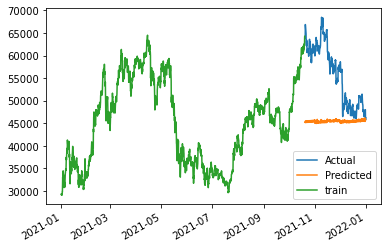

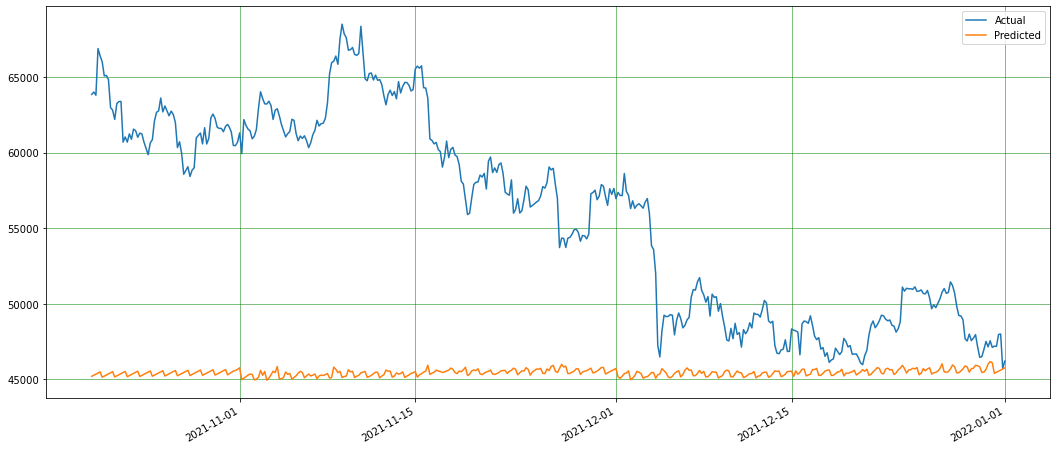

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [63]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [64]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 51.6 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [65]:
Model_R.best_params_

{'tol': 0.001, 'max_iter': 400, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [66]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  136986969.97593


# MAE

In [67]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  9677.15785


# RMSE

In [68]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  11704.14328


# MAPE

In [69]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.16116


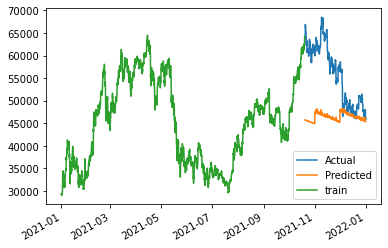

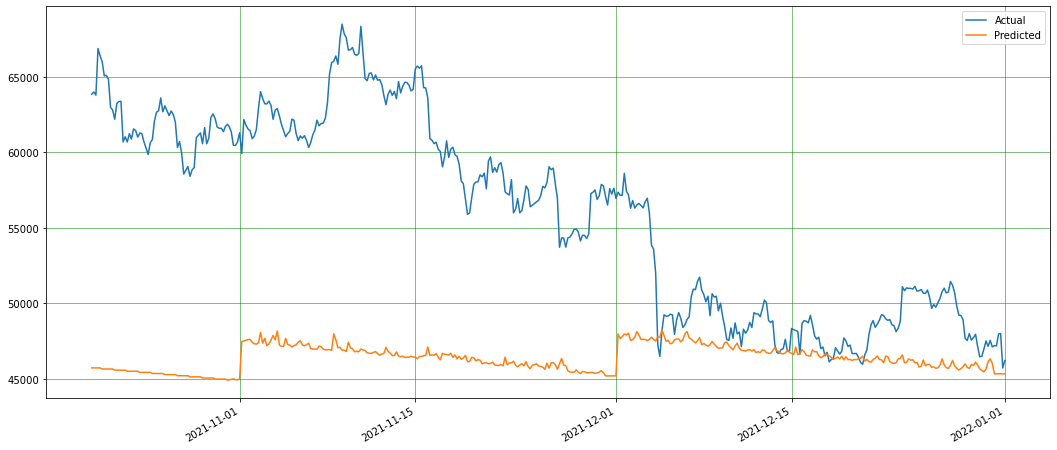

In [70]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [71]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [72]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 1.96 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [73]:
Model_R.best_params_

{'random_state': 30, 'min_samples_leaf': 50, 'max_depth': 10}

# Evaluation Measures on Test data

# MSE

In [74]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  43055712.65048


# MAE

In [75]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  5970.32377


# RMSE

In [76]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  6561.6852


# MAPE

In [77]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.10719


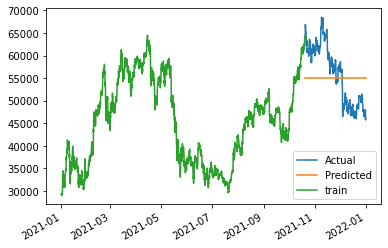

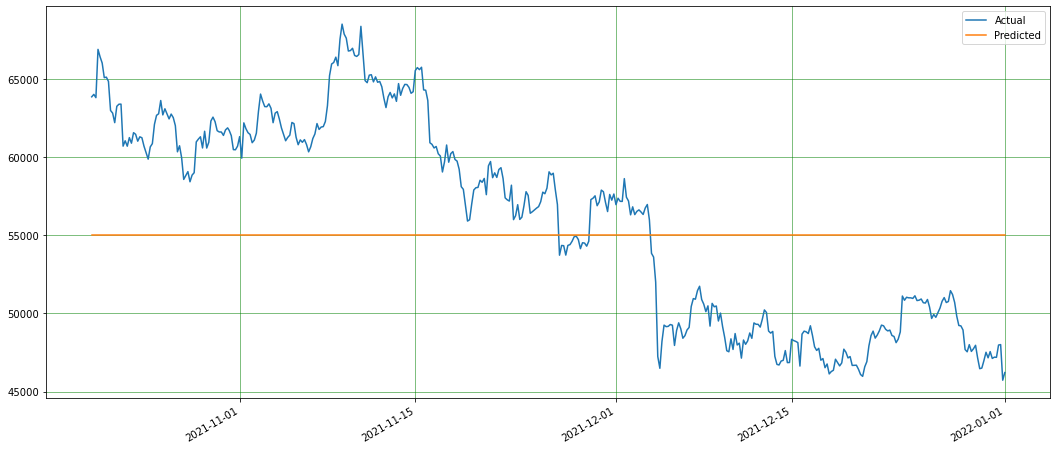

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [79]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [80]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 23 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [81]:
Model_R.best_params_

{'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1, 'base_score': 0.6}

# Evaluation Measures on Test data

# MSE

In [82]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  85053065.09477


# MAE

In [83]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  7801.6416


# RMSE

In [84]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  9222.42187


# MAPE

In [85]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.14554


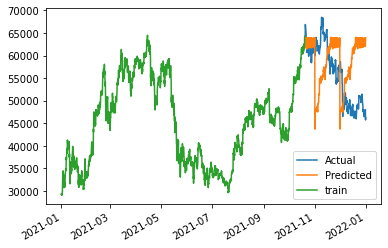

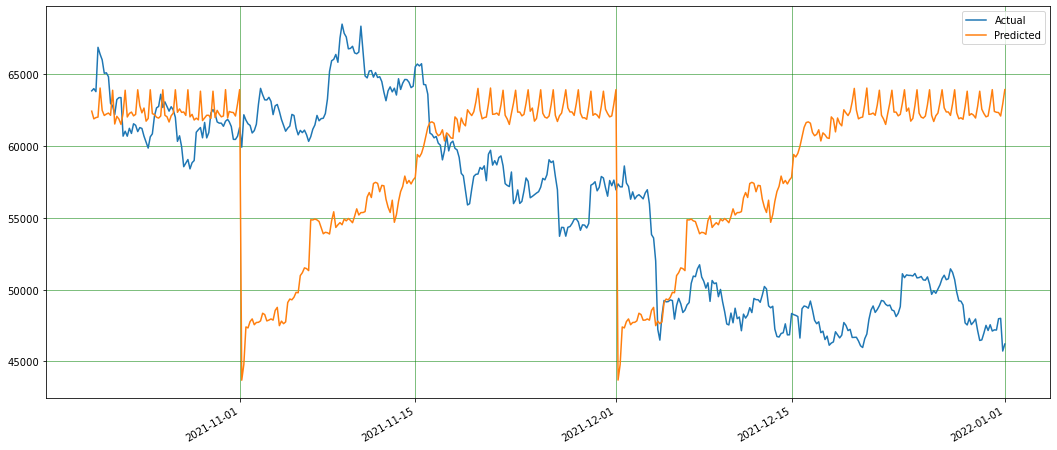

In [86]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [87]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["SVR Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+---------------+
|          Model          |   MSE score   |
+-------------------------+---------------+
|      KNN Algorithm      |  13195839.835 |
|      SVR Algorithm      |  15436120.135 |
|      MLP Algorithm      |  154803952.08 |
|     Ridge Algorithm     | 136986969.976 |
| Random Forest Algorithm |  43055712.65  |
|      XGB Algorithm      |  85053065.095 |
+-------------------------+---------------+




# Comparison of all algorithms Results on MAE score

In [88]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["KNN Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["SVR Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|      KNN Algorithm      |  2933.137 |
|      SVR Algorithm      |  3122.396 |
|      MLP Algorithm      | 10584.669 |
|     Ridge Algorithm     |  9677.158 |
| Random Forest Algorithm |  5970.324 |
|      XGB Algorithm      |  7801.642 |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [89]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["SVR Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|      KNN Algorithm      |  3632.608  |
|      SVR Algorithm      |  3928.883  |
|      MLP Algorithm      | 12442.024  |
|     Ridge Algorithm     | 11704.143  |
| Random Forest Algorithm |  6561.685  |
|      XGB Algorithm      |  9222.422  |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [90]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["KNN Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["SVR Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|      KNN Algorithm      |   0.053    |
|      SVR Algorithm      |   0.059    |
|      MLP Algorithm      |   0.178    |
|     Ridge Algorithm     |   0.161    |
| Random Forest Algorithm |   0.107    |
|      XGB Algorithm      |   0.146    |
+-------------------------+------------+


